## Exercice time series by **Hermann NZEUDEU** (Data scientist at DigiPlus consulting)

fr-fr
Je suis désolée si, en parcourant le carnet, vous vous rendez compte que j'ai écrit en français à certains endroits et en anglais à d'autres 😅(Oh, et les emojis aussi). I just want to enjoy it ! 🤗

en-en
I'm sorry if, as you look through the notebook, you realise that I've written in French in some places and in English in others 😅(Oh, and the emojis too). Je veux juste en profiter ! 🤗

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing data

In [2]:
raw_csv_data = pd.read_csv("../Data/index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

### Examining data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


- `date`: 
- *spx*, *dax*, *nikkie*, *ftse*

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


- count : count values for each column
- mean : average value of each column
- median : median value of each column
- mode : most frequent value of each column
- std : standard deviation of each column

*nous remarquons avec cette description que les valeurs de dax et ftse sont quasi similaires alors que spx et nikkei sont très éloignées* 🤔

In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

great ! none missing values 🫠

### Plotting the Data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Tu connais comment faire un line chart avec python ? sinon tu peux commençer par ceci.

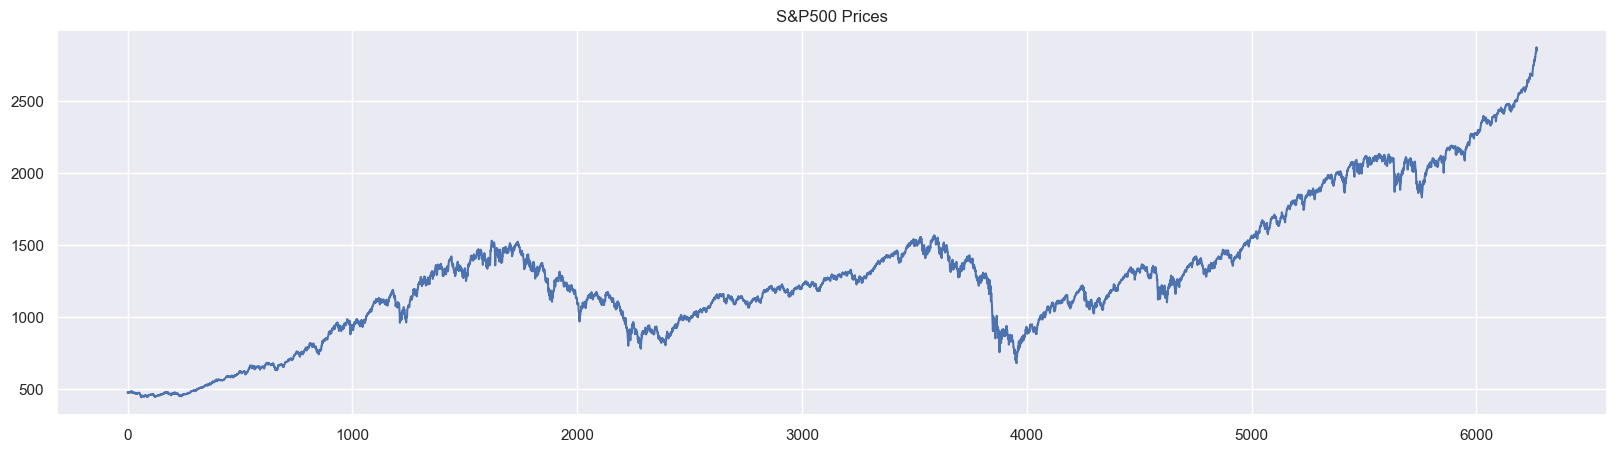

In [10]:
df_comp.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

Nous remarquons qu'il y a des pics à certains endroit (max et min) et cela se repète

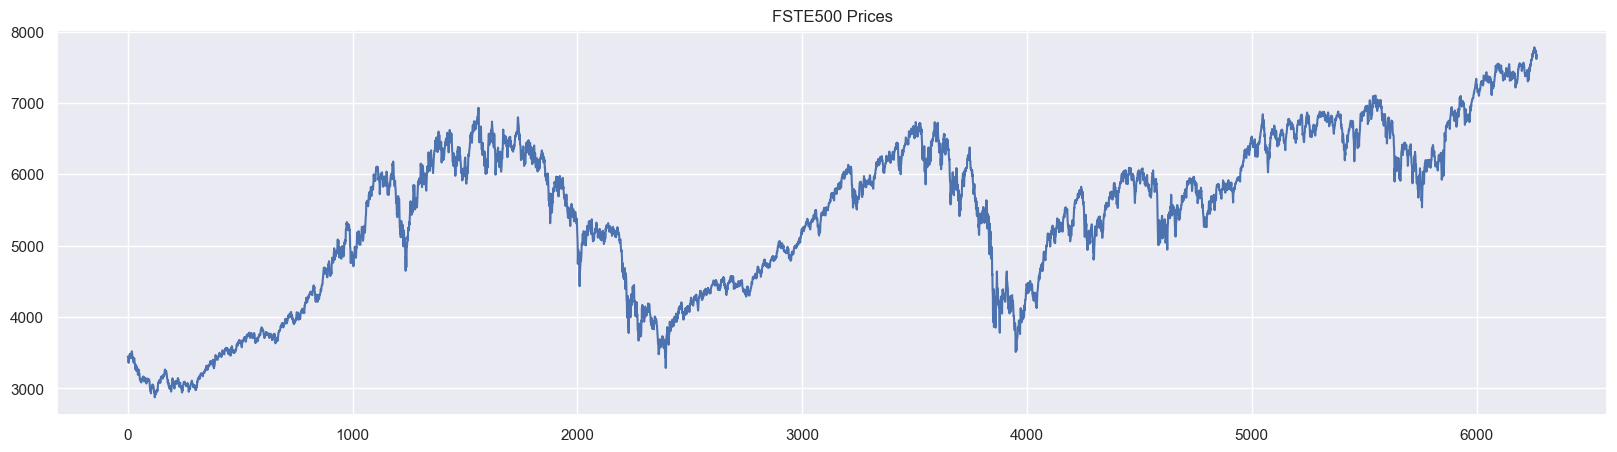

In [11]:
df_comp.ftse.plot(figsize=(20,5), title="FSTE500 Prices")
plt.show()

it's look quite similar than the previous.<br>
cela montre un parallèle entre le marché des US et celui de UK 

Nous pouvons essayer de les afficher sur le même graphe.

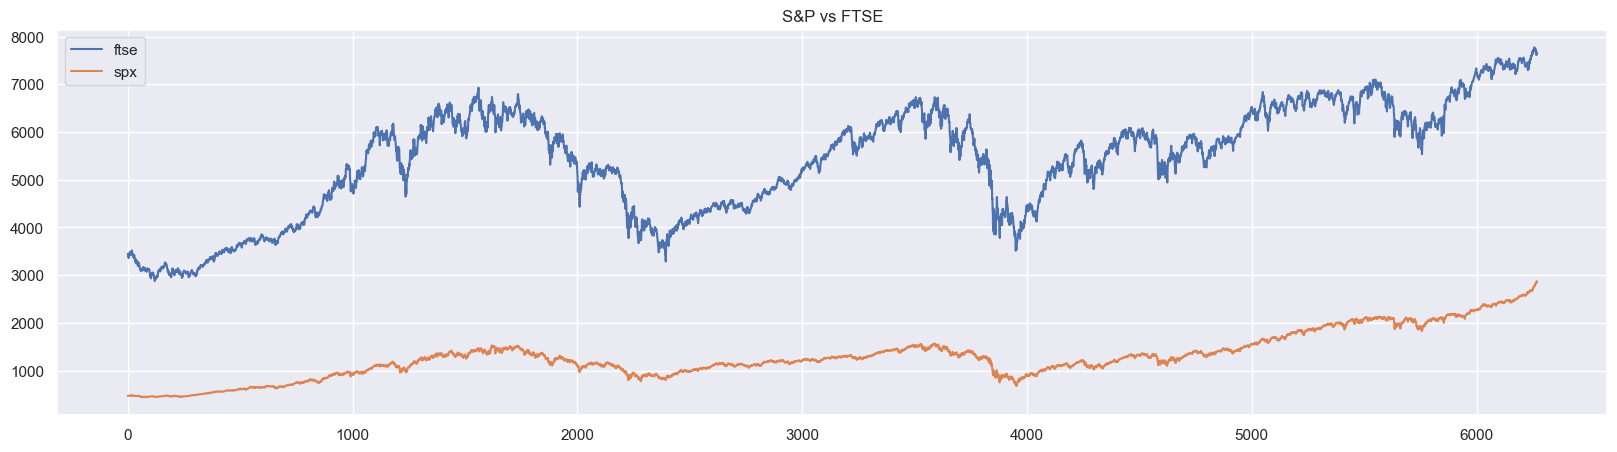

In [13]:
df_comp.ftse.plot(figsize=(20,5), title="FSTE500 Prices")
df_comp.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.title("S&P vs FTSE")
plt.legend()
plt.show()

the two look similar but the FSTE is the greatest.  
Nous remarquons aussi que spx est plus stable(i think that is a good information)

### The QQ plot
- The QQ diagram, or quantile-quantile diagram, is a graphical tool that helps us assess whether a set of data plausibly derives from a theoretical distribution such as a normal or exponential distribution. (for those who understand it 🤷‍♂️)

En gros, un **Q-Q plot** (Quantile-Quantile plot) sert à **comparer deux distributions** pour voir si elles se ressemblent.

#### Imagine ceci :

Supposons que tu veux vérifier si les notes des élèves dans un test suivent une distribution normale (la fameuse courbe en cloche où la majorité des élèves ont des notes moyennes, et très peu ont des notes extrêmement basses ou hautes). 

- Le **Q-Q plot** va te permettre de **visualiser** cette comparaison. 
- Sur ce graphique, si les points se placent en ligne droite, cela veut dire que les notes suivent bien la distribution normale.
- Si les points s'éloignent beaucoup de la ligne droite, c'est un signe que les notes ne suivent pas cette distribution normale.

#### Résumé :

Le Q-Q plot est un outil simple pour **vérifier** si les données que tu as (comme les notes, la taille des gens, etc.) suivent une distribution que tu connais déjà (comme la normale). Il te montre visuellement les écarts pour que tu puisses voir d'un coup d'œil si tout est comme prévu ou non.

In [14]:
from scipy import stats
import pylab

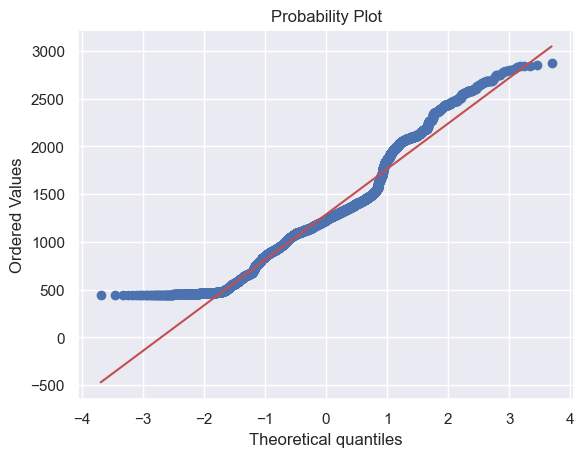

In [15]:
stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

We can see that the spx is not normally distributed, as there are many values equal to 500 compared with others.

<Axes: >

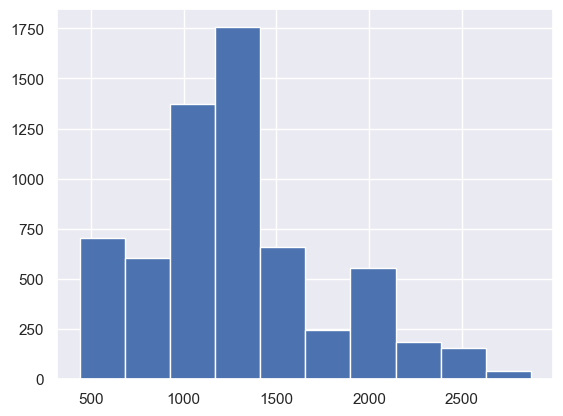

In [16]:
df_comp.spx.hist()